#### 2.Frequency of each cluster

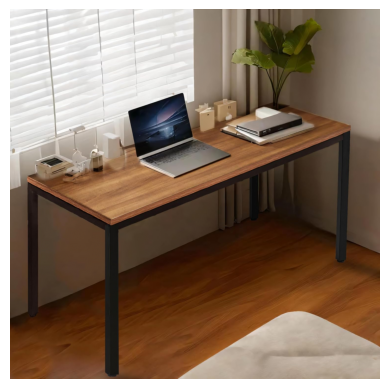

c:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


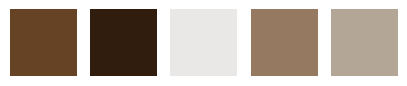

Ordered Dominant Colors:
 [[0.40572409 0.26300546 0.1509028 ]
 [0.19192755 0.11395296 0.05563789]
 [0.9142551  0.91050365 0.90324307]
 [0.58656331 0.4769362  0.37820892]
 [0.70927008 0.65427254 0.59590572]]
Percentage of each color (rounded):
 [33.63 24.64 15.72 14.01 11.99]


In [1]:
# 2.Frequency of each cluster
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import image as mp_image
from matplotlib import pyplot as plt

def extract_ordered_dominant_colors(image_path, num_colors):
    # Load and normalize image
    image = mp_image.imread(image_path) / 255.0
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Reshape the image to be a list of pixels
    pixels = image.reshape(-1, 3)
    
    # Use KMeans to find main colors
    model = KMeans(n_clusters=num_colors)
    model.fit(pixels)
    
    # Get the colors and labels
    colors = model.cluster_centers_
    labels = model.labels_
    
    # Count labels to find the frequency of each cluster
    count_labels = np.bincount(labels)
    total_pixels = len(pixels)
    
    # Calculate the percentage of each cluster
    percentages = 100 * count_labels / total_pixels
    percentages_rounded = np.round(percentages, 2)  # Round to 2 decimal places
    
    # Order the clusters by their frequency (most common first)
    ordered_indices = np.argsort(count_labels)[::-1]  # Descending order
    ordered_colors = colors[ordered_indices]
    ordered_percentages = percentages_rounded[ordered_indices]
    
    # Display the ordered dominant colors
    plt.figure(figsize=(num_colors, 2))
    for i, color in enumerate(ordered_colors):
        plt.subplot(1, num_colors, i+1)
        plt.imshow([[color]])
        plt.axis('off')
    plt.show()
    
    return ordered_colors, ordered_percentages

# Use the function
ordered_dominant_colors, ordered_percentages = extract_ordered_dominant_colors('test_images\AAIRLLENSleekandSturdyInchComputerDeskPerfectforWorkandStudyMultiPurposeTableforWritingDiningandWorkstation.jpg', num_colors=5)
print("Ordered Dominant Colors:\n", ordered_dominant_colors)
print("Percentage of each color (rounded):\n", ordered_percentages)


In [ ]:
import pandas as pd
import re, os
from urllib.parse import urlparse, unquote

def extract_ordered_colors():
    


if __name__ = "__main__":
    extract_ordered_colors()
        

In [ ]:
import pandas as pd
import re, os
from urllib.parse import urlparse, unquote

# remove metacharacters from title
def processed_title(text):
    return re.sub(r'\W+', ' ', text).lower()

# make list of keywords from title.
def extract_keywords(title):
    # This function should be improved with a better keyword extraction algorithm
    return title.split()

# match title and url, return score
def match_url(title_keywords, url):
    parsed_url = urlparse(url)
    url_path = unquote(parsed_url.path + parsed_url.query)
    url_keywords = re.findall(r'\b\w+\b', url_path)
    score = sum(keyword in url_keywords for keyword in title_keywords)
    return score

# search through urls, find best url for the title
def find_best_url_match(title, urls_df):
    title_keywords = extract_keywords(processed_title(title))
    best_score = 0
    best_url = None
    for url in urls_df['Product URL']:
        score = match_url(title_keywords, url)
        if score > best_score:
            best_score = score
            best_url = url
    return best_url


names = ['Sectional_Sofas', 'Sleeper_Sofas', 'Reclining_Sofas', 'LoveSeats', 'Futons', 'Settles', 'Convertibles', 
         'Accent_Chairs', 'Coffee_Tables', 'TV_Stands', 'End_Tables', 'Console_Tables', 'Ottomans', 'Living_Room_Sets', 
         'Decorative_Pillows', 'Throw_Blankets', 'Area_Rugs', 'Wall_Arts', 'Table_Lamps', 'Floor_Lamps', 
         'Pendants_and_Chandeliers', 'Sconces', 'Baskets_and_Storage', 'Candles', 'Live_Plants', 'Artificial_Plants', 
         'Planters', 'Decorative_Accessories', 'Window_Coverings', 'Decorative_Mirrors', 'Dining_Sets', 
         'Dining_Tables', 'Dining_Chairs', 'Bar_Stools', 'Kitchen_Islands', 'Buffets_and_Sideboards', 'China_Cabinets', 
         'Bakers_Recks', 'Bedroom_Sets', 'Mattresses', 'Nightstands', 'Dressers', 'Beds', 'Bedframes', 'Bases', 'Vanities', 
         'Entryway_Furnitures', 'Desks', 'Desk_Chairs', 'Bookcases', 
         'File_Cabinets', 'Computer_Armoires', 'Drafting_Tables', 'Cabinets', 'Furniture_Sets']


infos_path = '/home/all/product_infos/'
urls_path = '/home/all/product_urls/'

def main():
    for name in names:
        infos_file = os.path.join(infos_path, f'{name}_product_infos.csv')
        urls_file = os.path.join(urls_path, f'{name}_product_urls.csv')

        if os.path.exists(infos_file) and os.path.exists(urls_file):
            infos_csv = pd.read_csv(infos_file)
            urls_csv = pd.read_csv(urls_file)
            
            # Check if 'Product URL' column already exists
            if 'Product URL' in infos_csv.columns:
                print(f"'Product URL' column already exists in {infos_file}. Skipping.")
                continue

            # Apply the function
            print(f'Processing with {infos_file}')
            infos_csv['Product URL'] = infos_csv['Title'].apply(lambda title: find_best_url_match(title, urls_csv))

            # Save the modified infos_csv back to a file without 'Unnamed: 0' column
            infos_csv.to_csv(infos_file, index=False)
        else:
            if not os.path.exists(infos_file) and not os.path.exists(urls_file):
                print(f'No both files for {name}')
            else:
                if not os.path.exists(infos_file):
                 print(f'No infos csv for {name}')
                if not os.path.exists(urls_file):
                    print(f'No url csv for {name}')
            

if __name__ == "__main__":
    main()
